In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/")

['benign', 'normal', 'malignant']

In [3]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [4]:
bengin = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/",0)
malignant = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/",1)
normal = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal/",2)

In [5]:
bengin.extend(malignant)
bengin.extend(normal)

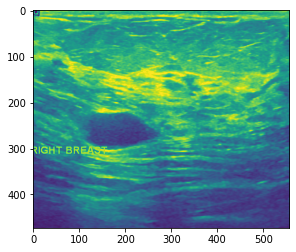

In [6]:
plt.imshow(bengin[0][0])

In [7]:
full_data = bengin

In [8]:
feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

In [9]:
feature_matrix[0]

array([[  0,  58, 188, ..., 196, 185, 176],
       [  0, 136, 206, ..., 196, 184, 177],
       [  1, 196, 196, ..., 179, 174, 175],
       ...,
       [ 27,  27,  28, ...,  28,  29,  29],
       [ 20,  21,  22, ...,  26,  26,  26],
       [ 12,  13,  14, ...,  25,  24,  24]], dtype=uint8)

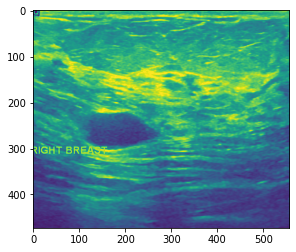

In [10]:
plt.imshow(feature_matrix[0])

In [11]:
label[0]

0

In [12]:
## resiized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    

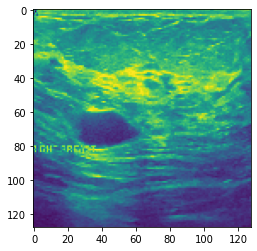

In [13]:
plt.imshow(X[0])

In [14]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

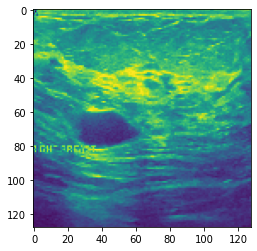

In [15]:
plt.imshow(X_corrected[0])

In [16]:
import numpy as np
np.array(X_corrected).shape

(1578, 128, 128)

In [17]:
X_M = np.array(X_corrected)

In [18]:
X_M.shape[1]

128

In [19]:
print(np.array(X_corrected).shape)
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])


(1578, 128, 128)
1578
128
128


In [20]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

In [21]:
X_M_R.shape

(1578, 128, 128, 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

In [24]:
import sys
from keras.utils import to_categorical
from keras.models import Sequential ###
from keras.layers import Conv2D    ####
from keras.layers import MaxPooling2D  ###
from keras.layers import Dense   ###
from keras.layers import Flatten ###
from keras.optimizers import SGD
from keras.optimizers import Adam ####

In [25]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## sparse_categorical_crossentropy

In [26]:
model =  define_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=1,validation_data=(X_test, np.array(y_test)))

37/37 [==============================] - 96s 3s/step - loss: 0.9887 - accuracy: 0.4967 - val_loss: 0.8018 - val_accuracy: 0.7089


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


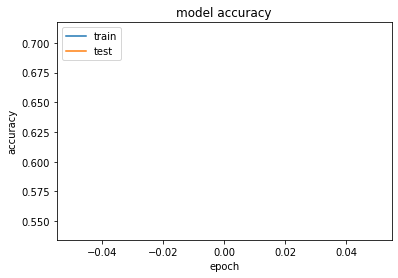

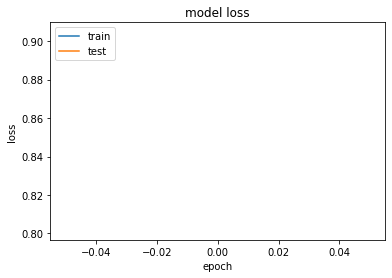

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model.evaluate(np.array(X_test),np.array(y_test))

13/13 [==============================] - 6s 429ms/step - loss: 0.8018 - accuracy: 0.7089


[0.8018224239349365, 0.7088607549667358]

In [29]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))

In [30]:
X_test.shape

(395, 128, 128, 1)

In [31]:
#### lebel of the X_test prediction
for item in predicted:
    print(item,)

2
0
0
0
0
0
2
2
0
0
0
0
0
2
0
0
0
1
0
2
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
2
0
0
0
1
0
0
0
0
0
1
0
1
0
2
0
0
0
0
2
0
0
0
0
0
0
0
2
0
0
0
2
0
0
1
0
0
0
0
2
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
2
0
0
0
1
0
1
0
0
0
1
0
0
2
0
0
0
0
0
2
1
2
2
0
0
0
0
2
1
1
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
2
0
1
0
0
0
0
0
0
2
0
0
0
0
2
1
2
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
1
1
1
2
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
2
0
0
0
0
2
0
1
0
0
0
1
0
0
2
0
0
1
0
2
0
0
0
0
0
0
2
0
0
0
0
1
0
2
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
2
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
conf = confusion_matrix(y_test,predicted)

In [34]:
import seaborn as sns

<AxesSubplot:>

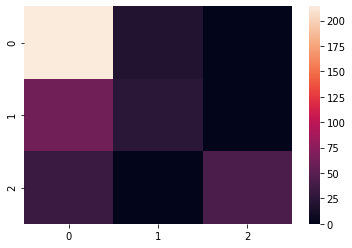

In [35]:
sns.heatmap(conf)

In [36]:
X_test.shape

(395, 128, 128, 1)

In [37]:
img = X_test[0]

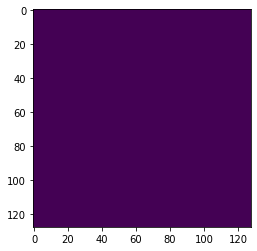

In [38]:
plt.imshow(img)

In [39]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

In [40]:
img1.shape

(1, 128, 128, 1)

In [41]:
np.argmax(model.predict(img1))

2

In [50]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT")
    elif predict==1:
        print("the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
    else:
        print("Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.")
        
    

In [51]:
image_prediction(X_test[0])

Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.


In [52]:
image_prediction(X_test[3])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT


In [54]:
image_prediction(X_test[5])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT


In [55]:
image_prediction(X_test[17])

the cells are not yet cancerous, but they have the potential to become malignant consult the doctor


In [56]:
image_prediction(X_test[2])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT
